# LAB 6

Authors: $\lambda$ Justin Ventura [jventura3@gulls.salisbury.edu] & Blaine Mason $\lambda$

Date: Wednesday, November 18th, 2020.

## - Description -

Supervised Learning: ** k-Nearest Neighbors **

We will be using the kNN algorithm on sample tests to ensure correctness, then apply to the Iris data set (this will be simple considering we have 4 different numeric value (4D vector) and a class), and then the adult data set (this will take more work, as the qualatative data will need adjustments in order to create a numeric representation for the vector; kNN requires numeric values in order to characterize *"distance"*).

In [12]:
# Libraries:
import numpy as np                 # Ol' reliable np.
import numpy.linalg as la          # Linear Alg np.
import pandas as pd                # Dataframe handling.
import matplotlib.pyplot as plt    # Plotting
from typing import List            # For type hinting.
from scipy import stats            # Makes my life easier

# Import iris the dataset:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)

# Import the adult dataset:
adult = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('adult dataset shape: ', adult.shape)
print('- Justin Ventura & Blaine Mason λ')

iris dataset shape:  (150, 5)
adult dataset shape:  (32561, 15)
- Justin Ventura & Blaine Mason λ


## K-Nearest Neighbor Implementation:

In [89]:
# Vector Class for the k-Nearest Neighbor Class.
class knn_vector:
    """ k-Nearest Neighbor vector class.

    This converts the format:
    List[ ( vals ... class ), ... ]

    into...
    Vector( <data>, <label> )
    """
    # Constructor of the vector class.
    def __init__(self, dim: int, vals):
        """ Initializes the vector. [Constructor]

        Args:
            dim [int]: number of quantitative elements in the list.
            vals [list]: the actual list for quantitative data + the class.
        """
        assert(dim and vals), '[init k_vect]: missing paramters!'
        assert(len(vals) - 1 == dim), '[init k_vect]: dim must equal len(values).'

        # Create the vector.
        self.dimensions = dim
        self.values = np.array(vals[0:-1])
        self.label = vals[-1]
    
    # Getter function for the values.
    def get_values(self):
        """ Return the values of the vector (no label).

        Args:
            None.  Just a simple getter.

        Returns:
            self.values [np.array(float/int)]: simple getter.
        """
        return self.values

    # Getter function for the label.
    def get_label(self):
        """ Return the label of the vector.

        Args:
            None.  Just a simple getter.

        Returns:
            self.label [any, typically int]: simple getter.
        """
        return self.label

    # Dunder for length:
    def __len__(self) -> int:
        """ Dunder for length. 
        
        Returns self.dimensions as len(<knn_vector>).
        """
        return self.dimensions

    # Dunder for printing:
    def __str__(self):
        """ Dunder for printing.

        Returns formatted string -> Vect: <vector>, Label: <label>.
        """
        return f'Vect: {self.values}, Label: {self.label}'

# K-Nearest Neighbor Class.
class kNN_Model:
    """ k-Nearest Neighbors Model Class.
    
    Uses training data in order to predict future values
    of new query points.
    """
    # kNN Model Constructor.
    def __init__(self, train_vect: List[knn_vector], k: int=3) -> None:
        """ Initializes the training_data. [Constructor] 
        
        Args:
            k [int]: the number of neighbors the model should
                     use in the 'voting' system. 3 by default.

            train_x [list]: pre-labeled (class) training data.
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]
        """
        self.k = k
        self.training_vect = train_vect

    # Calculate the distances of each train vector from the test vector.
    def distances(self, test_v=None) -> list:
        """ Calculates the distance between the training data & test point. 
        NOTE: done in linear O(n) time.

        Args:
            test_v [tuple]: a specific value to be tested against the training
            data.
        """
        return [la.norm(t.get_values() - test_v, axis=0) for t in self.training_vect]
    
    # Give the model training data.
    def train(self, train_v: List[knn_vector]=None) -> None:
        """ Trains the model with pre-labelled data.
        
        Args:
            train_x [ List[knn_vector] ]: the training data used to train model.
            * NOTE: if train_v is None, function immediately returns. *
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]

        Returns:
            None.
        """
        if not self.training_vect:
            self.training_vect = train_v
        
    # Predict the value of a given query point; returns label.
    def predict(self, query_point=None):
        """ Uses the model in order to predict what to label the query point.
        
        Args:
            query_point [tuple(<numeric_data>)]: the point in which a class will
            be predicted for.
            
        Returns:
            'Class' [int]: The 'Class' will be the numeric class that this algorithm
                           deems closest to the possible classes it has been trained
                           to identify.
        """
        # TODO: use a k-d tree for O(logn) searches.  For now we can use the
        # naive O(n) "brute force" approach.
        assert(query_point is not None), '[kNN_Model.predict()]: query point undefined.'

        labels = [v.get_label() for v in self.training_vect]
        dist = zip(self.distances(query_point), labels)
        dist = sorted(dist)
        candidates = [d[1] for d in dist[:self.k]]
        return stats.mode(candidates)[0]

## Testing kNN model with k = 5.

In this cell, I came up with semi-random* points to mark 'territories' for each class.  Then for points $(x, y)$ sampled uniformly random $\in [-4, 4]$, were used to test against the model.  I am aware that the training data is usually supposed to be greater than the testing data, but I found it interesting to see the cool clusters that form from 100-1000 samples from just knowing 5 points in each class (15 training points in total).

*semi-random with bias for my own 'clusters.'

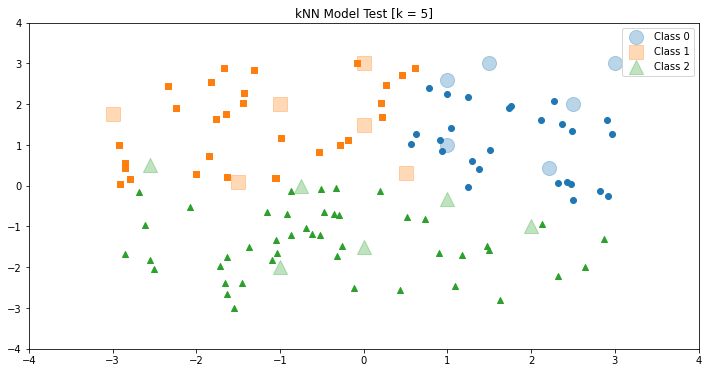

Class 0 has 0.26% of the 'territory.'
Class 1 has 0.29% of the 'territory.'
Class 2 has 0.45% of the 'territory.'


In [26]:
"""
K-NEAREST NEIGHBORS MODEL TESTING CELL:

Justin's IQ peaked while making this. (approximately 56 IQ points, new record!)
"""
# Set up the training data.
train_points0 = [(2.5, 2, 0), (1.5, 3, 0), (1, 2.6, 0), (1, 1, 0), (3, 3, 0), (2.21, 0.44, 0)]
train_points1 = [(-1, 2, 1), (.5, 0.3, 1), (0, 3, 1), (0, 1.5, 1), (-3, 1.75, 1), (-1.5, 0.10, 1)]
train_points2 = [(-1, -2, 2), (-.75, 0, 2), (2, -1, 2), (0, -1.5, 2), (-2.55, 0.5, 2), (1, -0.33, 2)]
train_data = train_points0 + train_points1 + train_points2
train_data = [knn_vector(2, v) for v in train_data]
Lambda = kNN_Model(train_data, 5)

# Take random samples for now.
NUM_SAMPLES = 100
plt.rcParams['figure.figsize'] = [12, 6]
sample_data = {'Class 0': 0, 'Class 1': 0, 'Class 2': 0}
for i in range(NUM_SAMPLES):
    query = np.random.uniform(-3, 3), np.random.uniform(-3, 3)
    result = Lambda.predict(query)
    if result == 0:
        sample_data['Class 0'] += 1
        plt.scatter(query[0], query[1], c='tab:blue', marker='o')
    elif result == 1:
        sample_data['Class 1'] += 1
        plt.scatter(query[0], query[1], c='tab:orange', marker='s')
    elif result == 2:
        sample_data['Class 2'] += 1
        plt.scatter(query[0], query[1], c='tab:green', marker='^')

# Now plot it all, gamers RISE!
X0 = [x for x, _, _ in train_points0]
Y0 = [y for _, y, _ in train_points0]
X1 = [x for x, _, _ in train_points1]
Y1 = [y for _, y, _ in train_points1]
X2 = [x for x, _, _ in train_points2]
Y2 = [y for _, y, _ in train_points2]
plt.title('kNN Model Test [k = 5]')
plt.scatter(X0, Y0, c="tab:blue", label='Class 0', s=200, alpha=0.3, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", label='Class 1', s=200, alpha=0.3, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", label='Class 2', s=200, alpha=0.3, marker='^')   # training group 2
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
for c, count in sample_data.items():
    print(f"{c} has {count/NUM_SAMPLES}% of the 'territory.'")
pass

## Supervised Test against specific points.

Now we will pick points and give them labels, then compare them to the predictions.

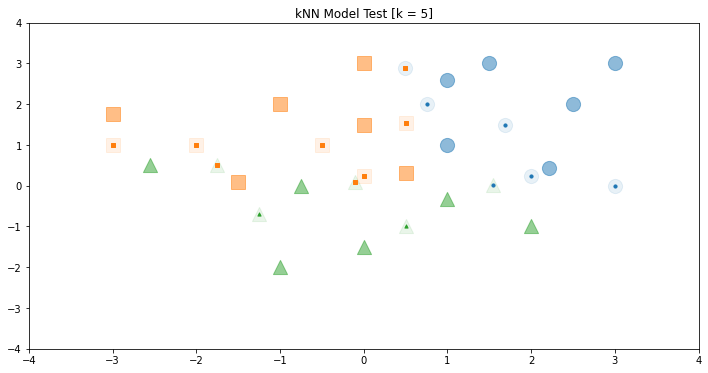

Large/Transparent=ACTUAL, Thick/Small=PREDICTED


In [24]:
# Gamers rise.
test_points0 = [(2, 0.25), (0.75, 2), (0.49, 2.89), (1.69, 1.5), (3, 0)]
test_points1 = [(0.51, 1.55), (0, 0.24), (-0.5, 1), (-2, 1), (-3, 1)]
test_points2 = [(-1.75, 0.5), (-0.1, 0.1), (1.55, 0.02), (0.5, -1), (-1.25, -0.70)]

plt.rcParams['figure.figsize'] = [12, 6]
def scatter_test(test, result, sample_data):
    if test in test_points0:
        plt.scatter(test[0], test[1], c='tab:blue', s=200, marker='o', alpha=0.1)
    elif test in test_points1:
        plt.scatter(test[0], test[1], c='tab:orange', s=200, marker='s', alpha=0.1)
    elif test in test_points2:
        plt.scatter(test[0], test[1], c='tab:green', s=200, marker='^', alpha=0.1)

    if result == 0:
        sample_data['Class 0'] += 1
        plt.scatter(test[0], test[1], c='tab:blue', s=10, marker='o')
    elif result == 1:
        sample_data['Class 1'] += 1
        plt.scatter(test[0], test[1], c='tab:orange', s=10, marker='s')
    elif result == 2:
        sample_data['Class 2'] += 1
        plt.scatter(test[0], test[1], c='tab:green', s=10, marker='^')

# Run up the tests!
s = {'Class 0': 0, 'Class 1': 0, 'Class 2': 0}
for t in test_points0:
    r = Lambda.predict(t)
    scatter_test(t, r, s)

for t in test_points1:
    r = Lambda.predict(t)
    scatter_test(t, r, s)

for t in test_points2:
    r = Lambda.predict(t)
    scatter_test(t, r, s)

# Plot the given points again.
plt.title('kNN Model Test [k = 5]')
plt.scatter(X0, Y0, c="tab:blue", s=200, alpha=0.5, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", s=200, alpha=0.5, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", s=200, alpha=0.5, marker='^')   # training group 2
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
print('Large/Transparent=ACTUAL, Thick/Small=PREDICTED')
del Lambda
pass

## Write a python routines to split a given data set (randomly) into testing and training subsets. It’s a good idea to parameterize this process with a percentage p so the data is split into sets of size np and n(1 − p); then you can “tune” p later for your specific training/testing procedure.

In [90]:
# Data splitting function.
def partition(n: int, p: float, vectors: List[knn_vector]):
    """ Partition the given knn_vectors into training/testing groups.
        NOTE: this is done at random.
    Args:
        n [int]: number of knn_vectors.
        
        p [float]: percentage for the training/testing split.

        vectors [ List[knn_vector] ]: a list of all the vectors which will
                   be partitioned into two groups.

    Returns:
        test, train [ tuple( List[knn_vectors] ) ]: the partitioned data
                   in two groups with lengths np & n(1-p) respectively.
    """
    assert(vectors is not None), '[partition]: no vectors given!'
    assert(n == len(vectors)), '[partition] n is not equal to # vectors.'
    assert(0.1 <= p < 1), '[partition]: groups must be validly partitioned!'
    
    train_size = int(n*p)

    group = np.random.shuffle(vectors)
    train, test = vectors[:train_size], vectors[train_size:]
    
    return train, test

##  Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.

In [104]:
# Convert iris data to vectors.
def iris_to_vectors(iris_data):
    """ Converts a DF to a list of kNN_vectors.

    Args:
        iris_data [pd.df]: df to be converted.

    Return:
        result [List[knn_vectors]]: formatted vectors for the kNN model.
    """
    rows = list(iris_data[0:-1].to_records(index=False))
    results = []
    for r in rows:
        results.append(knn_vector(4, list(r)))
    return results

# Testing samples:
def iris_predictions(model: kNN_Model, test_data: List[knn_vector]):
    """ Tests the kNN_Model with Iris data.

    Args:
        model [kNN_Model]: the pre-trained model to do predictions.

        test_data [ List[knn_vector] ]: the data to predict.

    Returns:
        None.
    """
    # Initialize counts for confusion matrix.
    setosa_totals = 0
    setosa_correct = 0
    versi_totals = 0
    versi_correct = 0
    virgin_totals = 0
    virgin_correct = 0

    # Run the tests:
    for elem in test_data:

        # Predict the flower type.
        result = model.predict(elem.get_values())

        # Accumulate flowers:
        if elem.get_label() == 'Iris-setosa':
            setosa_totals += 1
            if elem.get_label() == result:
                setosa_correct += 1

        elif elem.get_label() == 'Iris-versicolor':
            versi_totals += 1
            if elem.get_label() == result:
                versi_correct += 1

        elif elem.get_label() == 'Iris-virginica':
            virgin_totals += 1
            if elem.get_label() == result:
                virgin_correct += 1
    
    # Display the results:
    print('-'*50)
    print('Iris-setosa results:')
    print(f'Actual: {setosa_totals}, predicted: {setosa_correct}.')
    print(f'Precision: {setosa_correct/setosa_totals * 100}%')
    print('-'*50)
    print('Iris-versicolor results:')
    print(f'Actual: {versi_totals}, predicted: {versi_correct}.')
    print(f'Precision: {versi_correct/versi_totals * 100}%')
    print('-'*50)
    print('Iris-viginica results:')
    print(f'Actual: {virgin_totals}, predicted: {virgin_correct}.')
    print(f'Precision: {virgin_correct/virgin_totals * 100}%')
    print('-'*50)


# Run some tests, get some data:
p = 0.8
data = iris_to_vectors(iris)
training, testing = partition(len(data), p, vectors=data)
Lambda = kNN_Model(training, k=5)
iris_predictions(Lambda, testing)

--------------------------------------------------
Iris-setosa results:
Actual: 24, predicted: 24.
Precision: 100.0%
--------------------------------------------------
Iris-versicolor results:
Actual: 25, predicted: 22.
Precision: 88.0%
--------------------------------------------------
Iris-viginica results:
Actual: 26, predicted: 25.
Precision: 96.15384615384616%
--------------------------------------------------


## Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.